<h2> Dataset Overview </h2>
The dataset used for this project contains transactions made by credit cards. It includes a highly imbalanced set of observations, where fraudulent transactions are a small fraction of the total.

<h3> Features </h3>
V1-V28: Principal components obtained via PCA. <br>
Amount: Transaction amount. <br>
Time: Time elapsed from the first transaction. <br>
Class: Fraud status (0 for non-fraud, 1 for fraud).

<h3> Objectives </h3>
Detect fraudulent transactions from credit card data. <br>
Handle the issue of data imbalance. <br>
Compare model performance and select the best approach.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data= pd.read_csv(r"D:\Class\Data Science Project\creditcard.csv")

In [4]:
df= data.copy()

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Display All Columns
pd.options.display.max_columns = None
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [8]:
print('Number of columns:', df.shape[1])
print('Number of rows:', df.shape[0])

Number of columns: 31
Number of rows: 284807


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<h2> Visualize Class Imbalance </h2>

In [12]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

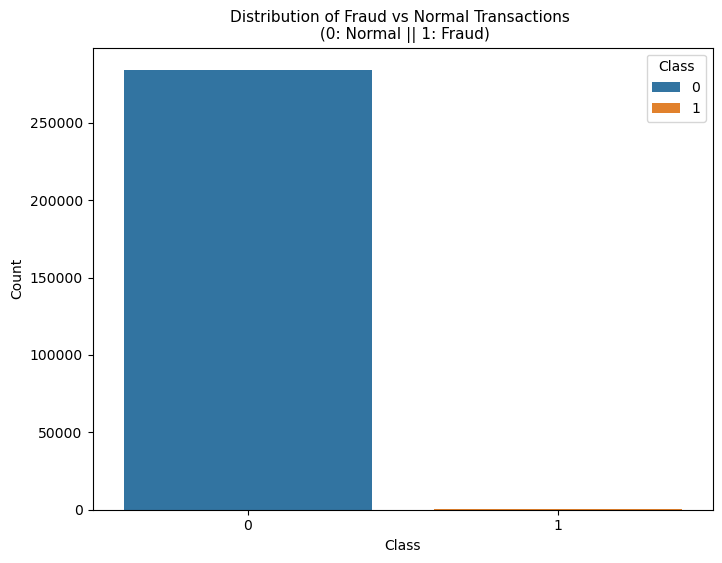

In [13]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data = df, hue='Class')
plt.title('Distribution of Fraud vs Normal Transactions \n (0: Normal || 1: Fraud)', fontsize=11)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<h2> Data Preprocessing </h2>
Check for missing or null values. <br>
Handle duplicates. <br>
Scale the features (Amount, Time). <br>
Split features and target.

In [15]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
# Check for duplicate rows
df.duplicated().sum()

1081

In [17]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(283726, 31)

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df['Amount'] = ss.fit_transform(df[['Amount']])
df['Time'] = ss.fit_transform(df[['Time']])

In [20]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [21]:
# Split features and target i.e dependent and independent variables
x = df.drop('Class', axis=1)
y = df['Class']

In [22]:
# Calculate the correlation matrix
corr_matrix = df.corr()
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


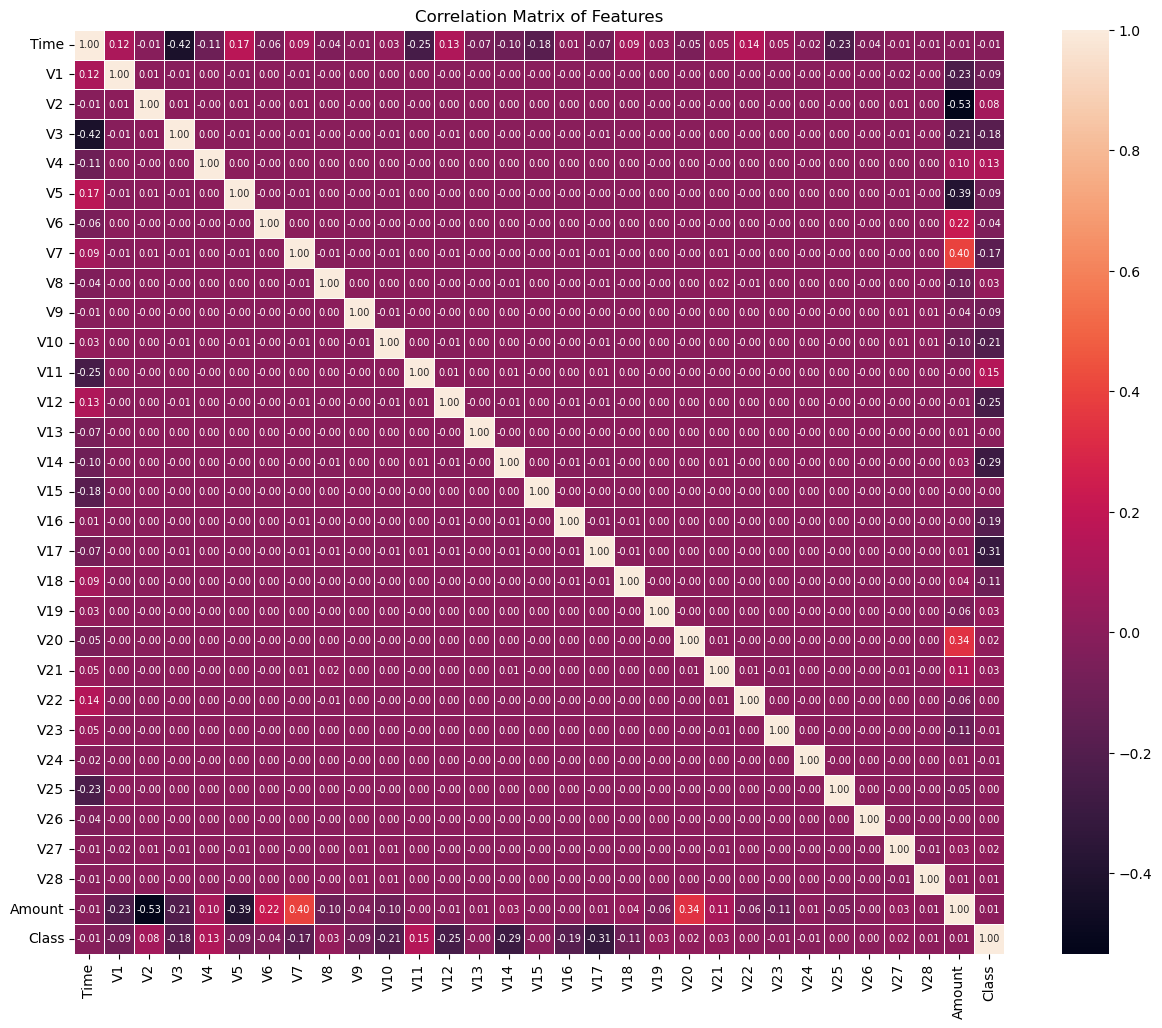

In [23]:
# Plot the Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, annot_kws={"size":7})
plt.title('Correlation Matrix of Features')
plt.show()

In [24]:
# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [25]:
x_train.shape, x_test.shape

((226980, 30), (56746, 30))

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [27]:
def train_model(x_train, x_test, y_train, y_test):
    classifier = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "Random Forest Classifier": RandomForestClassifier(random_state=101)
    }

    for name, model in classifier.items():
        print(f"\n================ {name} ================\n")
        model.fit(x_train, y_train)
        
        # Make predictions
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        
        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred_test)
        print(f"Confusion Matrix:\n{conf_matrix}")

        # Accuracy
        print(f"\nAccuracy of Training Data: {accuracy_score(y_train, y_pred_train)}")
        print(f"\nAccuracy of Testing Data: {accuracy_score(y_test, y_pred_test)}")
        
        # Classification report
        clf_report = classification_report(y_test, y_pred_test)
        print(f"\nClassification Report:\n{clf_report}")

        # ROC-AUC Score
        roc_auc = roc_auc_score(y_test, y_pred_test)
        print(f"ROC-AUC Score: {roc_auc}")
    
        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve \n using {name}', fontsize=10)
        plt.legend(loc='best')
        plt.show()
        print("\n")x


================ Logistic Regression ================

Confusion Matrix:
[[56648     9]
 [   37    52]]

Accuracy of Training Data: 0.9992157899374394

Accuracy of Testing Data: 0.9991893701758714

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56657
           1       0.85      0.58      0.69        89

    accuracy                           1.00     56746
   macro avg       0.93      0.79      0.85     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC Score: 0.7920554061469443


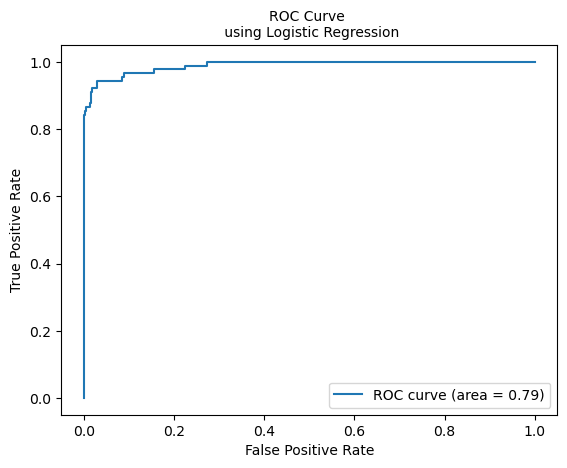




================ Decision Tree Classifier ================

Confusion Matrix:
[[56637    20]
 [   24    65]]

Accuracy of Training Data: 1.0

Accuracy of Testing Data: 0.9992246149508336

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56657
           1       0.76      0.73      0.75        89

    accuracy                           1.00     56746
   macro avg       0.88      0.86      0.87     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC Score: 0.864992038628665


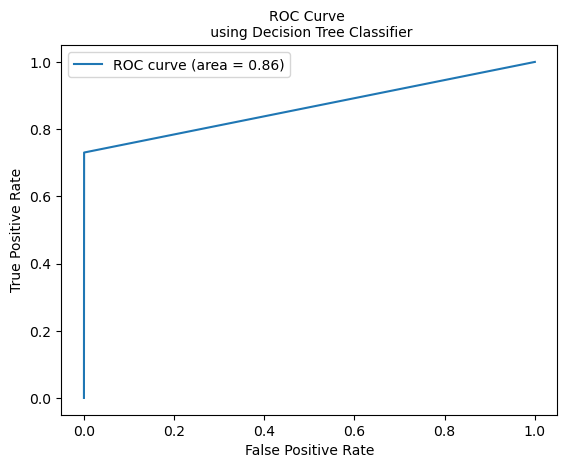




================ Random Forest Classifier ================

Confusion Matrix:
[[56654     3]
 [   22    67]]

Accuracy of Training Data: 0.9999955943254912

Accuracy of Testing Data: 0.9995594403129736

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56657
           1       0.96      0.75      0.84        89

    accuracy                           1.00     56746
   macro avg       0.98      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC Score: 0.8763780192774457


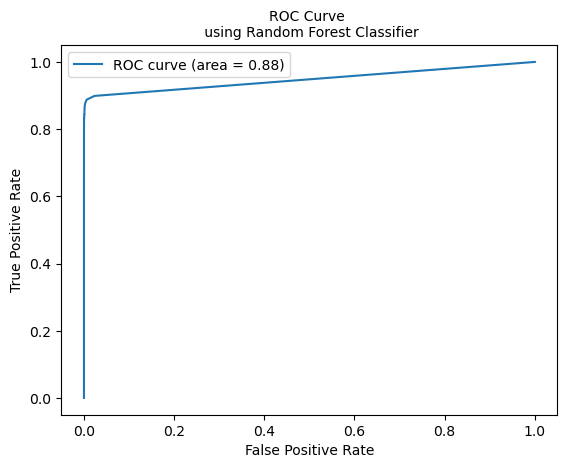

In [28]:
# Call the train_model function
train_model(x_train, x_test, y_train, y_test)

<h3> Handling Imbalanced Data </h3>
Two techniques: <br>
Undersampling <br>
Oversampling

<h1> Undersampling </h1>

In [31]:
# Separate normal and fraud transactions
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

# Print shape for reference
print('Normal transactions shape:', normal.shape)
print('Fraud transactions shape:', fraud.shape)

Normal transactions shape: (283253, 31)
Fraud transactions shape: (473, 31)


In [32]:
# Undersample normal transactions
normal_sample = normal.sample(n=fraud.shape[0])

In [33]:
# Print the shape of the new normal transactions
print('New normal transactions shape:', normal_sample.shape)

New normal transactions shape: (473, 31)


In [34]:
# Concate updated normal transcations with old fraud transaction and make a new df
new_df = pd.concat([normal_sample, fraud], ignore_index=True)

In [35]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.856299,1.956695,-0.549841,-1.477787,0.390091,0.174918,0.204682,-0.208724,0.069853,1.235229,-0.028142,-0.307881,0.532422,-1.174572,0.236368,-1.573284,-0.556069,-0.289116,0.557574,0.735537,-0.204848,0.292970,1.106156,-0.211830,0.259661,0.548163,0.094560,-0.018778,-0.067475,-0.183158,0
1,0.107094,1.945100,-0.061792,-0.508373,1.868481,-0.200596,-0.351322,-0.177596,-0.133095,2.522469,-0.360591,-0.597939,-2.171005,0.545742,1.356390,-2.359971,-0.895329,1.000934,-0.619737,0.025844,-0.406325,-0.490742,-0.799408,0.260758,-0.128458,-0.007003,-0.852302,0.010136,-0.051634,-0.317384,0
2,1.521134,-4.129444,4.083898,-3.773652,-1.376489,-1.208839,-1.919097,-0.671950,2.348622,0.114159,1.134855,0.148881,1.398789,-0.520282,2.291216,-0.884947,0.010936,0.396465,0.139108,-0.244156,0.376795,0.283948,0.778386,0.220185,0.016102,0.233809,0.126614,0.577985,0.450760,-0.350252,0
3,0.780711,-0.756808,1.432994,-0.474065,-0.451820,0.758032,-0.690353,0.780343,0.098463,0.257795,-1.034364,-0.986860,-0.511850,-0.680424,-1.704062,-0.765915,0.138071,1.185360,0.438325,-0.210636,-0.044460,0.033721,0.349239,-0.230274,0.647312,-0.201829,0.497963,-0.188504,-0.021687,-0.342025,0
4,1.460184,-0.961773,0.722730,1.121788,-0.909514,-0.242158,0.798998,-0.754680,0.055526,0.341082,-0.817284,-0.643361,0.131103,-0.667705,0.195696,-0.424402,1.110558,-0.919076,1.028696,0.264487,-0.408480,0.862212,-0.054118,-0.070059,-1.107646,-0.547150,0.388426,0.060146,0.067621,-0.325411,0


In [36]:
# Check new class distribution
new_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [37]:
# Split new df into X and y
x = new_df.drop('Class', axis=1)
y = new_df['Class']

In [38]:
# Train test split on Undersampled data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)


================ Logistic Regression ================

Confusion Matrix:
[[88  7]
 [ 6 89]]

Accuracy of Training Data: 0.9563492063492064

Accuracy of Testing Data: 0.9315789473684211

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        95
           1       0.93      0.94      0.93        95

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190

ROC-AUC Score: 0.9315789473684211


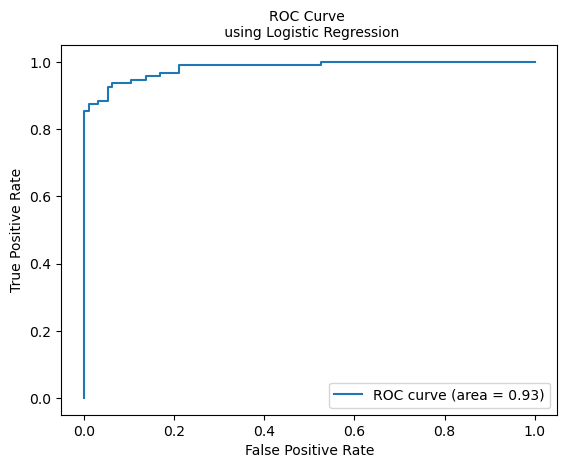




================ Decision Tree Classifier ================

Confusion Matrix:
[[84 11]
 [ 7 88]]

Accuracy of Training Data: 1.0

Accuracy of Testing Data: 0.9052631578947369

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        95
           1       0.89      0.93      0.91        95

    accuracy                           0.91       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.91      0.91      0.91       190

ROC-AUC Score: 0.9052631578947368


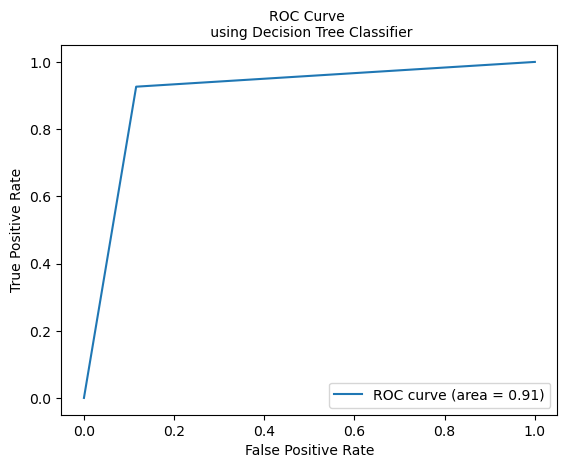




================ Random Forest Classifier ================

Confusion Matrix:
[[89  6]
 [ 9 86]]

Accuracy of Training Data: 1.0

Accuracy of Testing Data: 0.9210526315789473

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        95
           1       0.93      0.91      0.92        95

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190

ROC-AUC Score: 0.9210526315789475


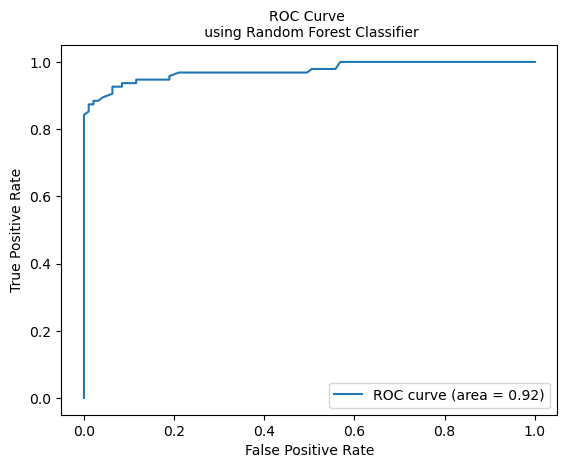

In [39]:
# Train models with undersampled data
# Call the train_model function
train_model(x_train, x_test, y_train, y_test)

<h1> Oversampling </h1>

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
# Split features and target
x = df.drop('Class', axis=1)
y = df['Class']

In [43]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=101)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [44]:
# Check new class distribution
y_resampled.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=101)


================ Logistic Regression ================

Confusion Matrix:
[[55243  1504]
 [ 4716 51839]]

Accuracy of Training Data: 0.9465649023397852

Accuracy of Testing Data: 0.9451024695062753

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56747
           1       0.97      0.92      0.94     56555

    accuracy                           0.95    113302
   macro avg       0.95      0.95      0.95    113302
weighted avg       0.95      0.95      0.95    113302

ROC-AUC Score: 0.9450542718761669


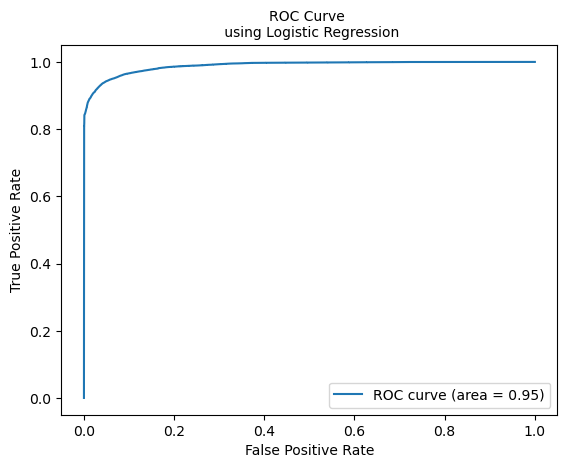




================ Decision Tree Classifier ================

Confusion Matrix:
[[56605   142]
 [   55 56500]]

Accuracy of Training Data: 1.0

Accuracy of Testing Data: 0.9982612840020476

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56747
           1       1.00      1.00      1.00     56555

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

ROC-AUC Score: 0.9982625802166533


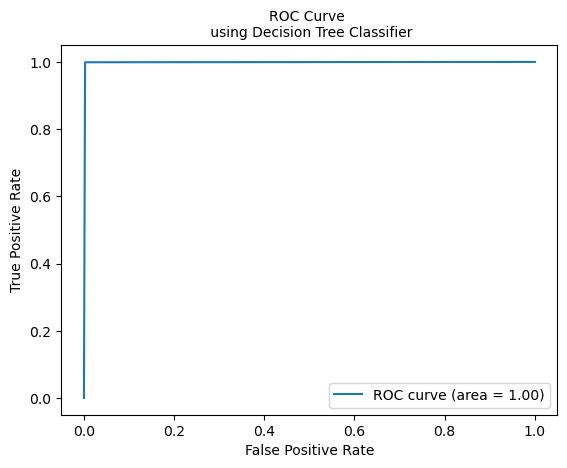




================ Random Forest Classifier ================

Confusion Matrix:
[[56735    12]
 [    0 56555]]

Accuracy of Training Data: 1.0

Accuracy of Testing Data: 0.999894088365607

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56747
           1       1.00      1.00      1.00     56555

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302

ROC-AUC Score: 0.9998942675383721


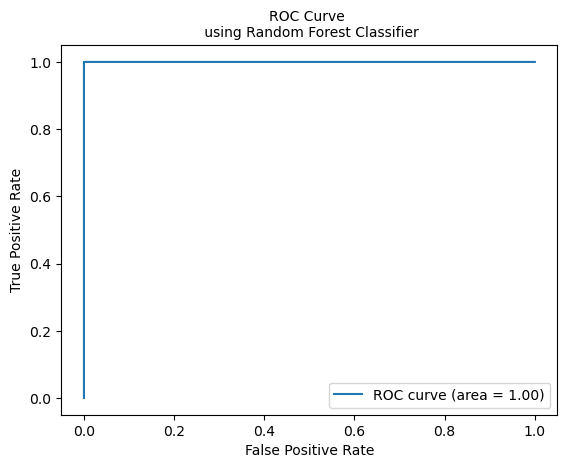

In [46]:
# Train models with oversampled data
# Call the train_model function
train_model(x_train, x_test, y_train, y_test)

Random Forest Classifier giving best accuracy_score and ROC-AUC score, hence using Random Forest Classifier for model training.

In [48]:
rfc = RandomForestClassifier(random_state=101)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=101)

In [49]:
# Predict with a sample data
pred = rfc.predict([[-1.2063166480452974,-0.653464067093327,1.15579454161356,1.4398458100309,-0.0483979577939286,
                       -0.257954764175468,-0.763320426103366,0.339229688923037,-0.768705965846787,-0.115541693321453,
                       -0.20021646873148,-0.650926246487322,-0.735778340137806,-1.3940656101548,0.447721760826057,
                       0.98477163074674,0.271223077633162,-0.251055900420813,-0.165413052650476,0.0091942158033362,
                       -0.160498072645411,0.518041029678345,-0.970619090556498,0.104889604203672,0.307935462300307,
                       -0.222502578722938,0.0825004649897294,0.291624326333603,0.125488524044667,-0.3442213776454372]])

# Print the prediction
if pred == 0:
    print("Normal Transaction")
else:
    print("Fraud Transaction")

Normal Transaction


<h3> Conclusion </h3>
In this analysis, we performed a comprehensive exploration and modeling process for credit card fraud detection using an imbalanced dataset. The steps included:

1. Data Exploration and Preprocessing: We began by loading and exploring the dataset, visualizing class imbalance, and performing necessary preprocessing steps.

2. Correlation Analysis: By investigating the correlations between features, we gained insights into how features interact with each other. This helped in identifying potential redundancies and understanding feature relationships.

3. Handling Imbalanced Data: We applied techniques such as undersampling and oversampling to address the class imbalance. This was crucial in ensuring that our models could better learn from the minority class.

4. Model Training and Evaluation: We trained and evaluated various classifiers, including Logistic Regression, Decision Tree, and RandomForest. We assessed model performance using metrics such as confusion matrices, classification reports, ROC-AUC scores, and ROC curves.

<h3> Key Findings </h3>

1. Feature Correlations: Our correlation analysis revealed important relationships between features. This understanding can guide feature selection and engineering in future analyses.

2. Model Performance: The RandomForestClassifier demonstrated high accuracy in detecting fraud, showing that it is a strong candidate for deployment. The ROC-AUC scores and ROC curves provided insights into each model’s performance, particularly in distinguishing between fraudulent and non-fraudulent transactions.

3. Impact of Imbalance Handling: Techniques for balancing the dataset were essential in improving model performance and ensuring that the minority class (fraudulent transactions) was adequately represented in the training process.